## Problem Statement

You are provided with a training file (.csv) with first names and the respective genders. Youraim is to write code to train and serve a machine learning model to assign a gender (male, female) to first names.The machine learning model must be able to determine the gender of names which have not been used to train the model. Please attempt this task to the best of your ability within 24 hours and send back to us. 

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading the data

In [2]:
df=pd.read_csv('name_gender.csv')

In [3]:
df

,first_name,gender,Unnamed: 2
0,Aaban,M,1.0
1,Aabha,F,1.0
2,Aabid,M,1.0
3,Aabriella,F,1.0
4,Aada,F,1.0
...,...,...,...
95020,Zyvion,M,1.0
95021,Zyvon,M,1.0
95022,Zyyanna,F,1.0
95023,Zyyon,M,1.0


#### Columns and their datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95025 entries, 0 to 95024
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  95025 non-null  object 
 1   gender      95025 non-null  object 
 2   Unnamed: 2  95025 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


#### Dropping unnamed column as it is useless

In [5]:
df.drop(['Unnamed: 2'],axis=1,inplace=True)

#### Checking for null values

In [6]:
df.isnull().sum()

first_name    0
gender        0
dtype: int64

In [7]:
# there are no null values in our datatset

## Analysing the target feature

In [8]:
df['gender'].value_counts()

F    60304
M    34721
Name: gender, dtype: int64

In [9]:
# the data is imbalanced

#### Visualising the target feature

c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

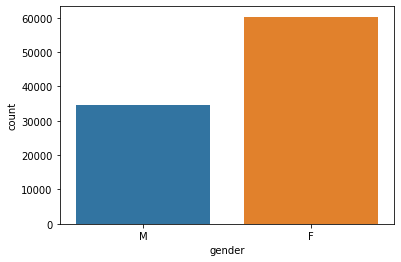

In [10]:
sns.countplot(df['gender'])

In [11]:
# Replacing All F and M with 0 and 1 respectively
df.gender.replace({'F':0,'M':1},inplace=True)

In [12]:
df.gender.unique()

array([1, 0], dtype=int64)

## Analysing first_name feature

In [13]:
# applying countvectorizer for the first_name
# it creates document-type matrix(sparse matrix) based on the count

In [14]:
Xfeatures=df['first_name']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [16]:
X

<95025x95025 sparse matrix of type '<class 'numpy.int64'>'
	with 95025 stored elements in Compressed Sparse Row format>

In [17]:
cv.get_feature_names()

['aaban',
 'aabha',
 'aabid',
 'aabriella',
 'aada',
 'aadam',
 'aadan',
 'aadarsh',
 'aaden',
 'aadesh',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhira',
 'aadhvik',
 'aadhya',
 'aadhyan',
 'aadi',
 'aadian',
 'aadil',
 'aadin',
 'aadish',
 'aadison',
 'aadit',
 'aadith',
 'aadithya',
 'aaditri',
 'aaditya',
 'aadiv',
 'aadon',
 'aadrian',
 'aadrika',
 'aadrit',
 'aadvik',
 'aadvika',
 'aadya',
 'aadyn',
 'aafia',
 'aafreen',
 'aagam',
 'aage',
 'aagot',
 'aahaan',
 'aahan',
 'aahana',
 'aahil',
 'aahir',
 'aahliyah',
 'aahna',
 'aahron',
 'aaidan',
 'aaiden',
 'aaidyn',
 'aaila',
 'aailiyah',
 'aailyah',
 'aaima',
 'aaira',
 'aairah',
 'aaisha',
 'aaishah',
 'aaiyana',
 'aaiza',
 'aaja',
 'aajah',
 'aajaylah',
 'aajon',
 'aakanksha',
 'aakarsh',
 'aakash',
 'aakeem',
 'aakilah',
 'aakira',
 'aakiyah',
 'aakriti',
 'aala',
 'aalaiya',
 'aalaiyah',
 'aalana',
 'aalanah',
 'aalani',
 'aalap',
 'aalaya',
 'aalayah',
 'aalayiah',
 'aalayjah',
 'aalayna',
 'aalaysha',
 'aalaysia',
 'aalea',
 

In [18]:
from sklearn.model_selection import train_test_split

# Features 
X
# Labels
y = df.gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6320331135119966

In [20]:
# Prediction

y_pred=clf.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Calculating metrices

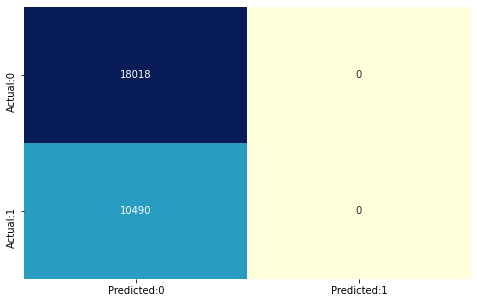

In [22]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [23]:
# from confusion matrix the false negative error is more

In [24]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18018
           1       0.00      0.00      0.00     10490

    accuracy                           0.63     28508
   macro avg       0.32      0.50      0.39     28508
weighted avg       0.40      0.63      0.49     28508



c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Tabulate the results

In [25]:
from sklearn import metrics

cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns = cols)

Naive_bayes = pd.Series({'Model': "Naive Bayes",
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})

result_tabulation = result_tabulation.append(Naive_bayes , ignore_index = True)

result_tabulation

c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.0,0.0,0.632033,0.0


In [26]:
# precision and recall is zero

## DictVectorization

In [27]:
# will create a function which creates a dictionary for each name containing
# first-letter,first2-letters,first3-letters,last-letter,last2-letters,last3-letters

In [28]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1:],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

In [29]:
# Vectorize the features function
features = np.vectorize(features)

In [30]:
# Extract the features for the dataset

df_X = features(df['first_name'])

df_y = df['gender']

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)

In [33]:
dfX_train

array([{'first-letter': 'M', 'first2-letters': 'Ma', 'first3-letters': 'Mar', 'last-letter': 'e', 'last2-letters': 'ie', 'last3-letters': 'rie'},
       {'first-letter': 'D', 'first2-letters': 'Da', 'first3-letters': 'Dak', 'last-letter': 'a', 'last2-letters': 'ia', 'last3-letters': 'ria'},
       {'first-letter': 'A', 'first2-letters': 'An', 'first3-letters': 'Ann', 'last-letter': 'e', 'last2-letters': 'ee', 'last3-letters': 'lee'},
       ...,
       {'first-letter': 'J', 'first2-letters': 'Jo', 'first3-letters': 'Jor', 'last-letter': 'l', 'last2-letters': 'el', 'last3-letters': 'rel'},
       {'first-letter': 'J', 'first2-letters': 'Ju', 'first3-letters': 'Jus', 'last-letter': 'n', 'last2-letters': 'an', 'last3-letters': 'ian'},
       {'first-letter': 'O', 'first2-letters': 'Ot', 'first3-letters': 'Otw', 'last-letter': 'y', 'last2-letters': 'ay', 'last3-letters': 'way'}],
      dtype=object)

In [34]:
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<66517x8883 sparse matrix of type '<class 'numpy.float64'>'
	with 399102 stored elements in Compressed Sparse Row format>

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

#intantiate the classifier
rf = RandomForestClassifier(n_estimators=50, random_state=10)

# fit the regressor with training dataset
rf.fit(dv.transform(dfX_train), dfy_train)

RandomForestClassifier(n_estimators=50, random_state=10)

In [36]:
# prediction
y_pred = rf.predict(dv.transform(dfX_test))
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Computing Metrices

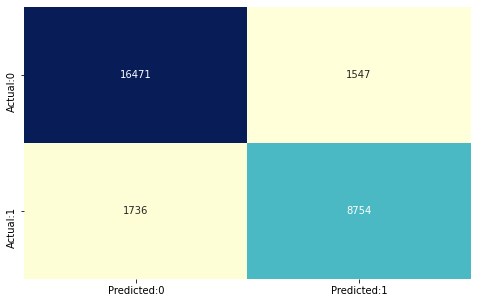

In [37]:
cm = confusion_matrix(dfy_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

#### Classification Report

In [38]:
result = classification_report(dfy_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     18018
           1       0.85      0.83      0.84     10490

    accuracy                           0.88     28508
   macro avg       0.88      0.87      0.88     28508
weighted avg       0.88      0.88      0.88     28508



In [39]:
random_forest = pd.Series({'Model': "random_forest",
                 'Precision Score': metrics.precision_score(dfy_test, y_pred),
                 'Recall Score': metrics.recall_score(dfy_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(dfy_test, y_pred),
                  'f1-score':metrics.f1_score(dfy_test, y_pred)})

result_tabulation = result_tabulation.append(random_forest , ignore_index = True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.00000,0.000000,0.632033,0.000000
1,random_forest,0.84982,0.834509,0.884839,0.842095


## OverSampling

In [40]:
df_X.shape,df_y.shape

((95025,), (95025,))

In [41]:
df_y.value_counts()

0    60304
1    34721
Name: gender, dtype: int64

In [42]:
from imblearn.over_sampling import RandomOverSampler


random = RandomOverSampler(random_state=0)
X_resampled, y_resampled = random.fit_resample(dv.transform(df_X),df_y)

In [43]:
y_resampled.value_counts()

0    60304
1    60304
Name: gender, dtype: int64

In [44]:
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

## Random Forest after oversampling

In [88]:
#intantiate the classifier
rf1 = RandomForestClassifier(n_estimators=25, random_state=0)

# fit the regressor with training dataset
rf1.fit(dfX_train, dfy_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [89]:
# prediction
y_pred = rf1.predict(dfX_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

#### Computing Metrices

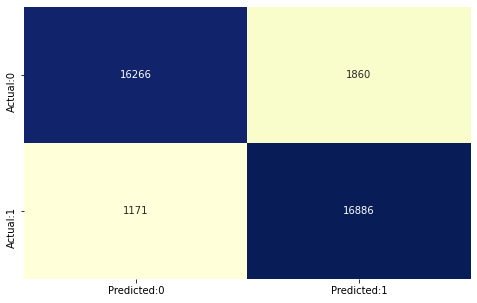

In [90]:
cm = confusion_matrix(dfy_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

#### Calssification Report

In [91]:
result = classification_report(dfy_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     18126
           1       0.90      0.94      0.92     18057

    accuracy                           0.92     36183
   macro avg       0.92      0.92      0.92     36183
weighted avg       0.92      0.92      0.92     36183



In [92]:
Random_Forest_OS = pd.Series({'Model': "Random_Forest_OS",
                 'Precision Score': metrics.precision_score(dfy_test, y_pred),
                 'Recall Score': metrics.recall_score(dfy_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(dfy_test, y_pred),
                  'f1-score':metrics.f1_score(dfy_test, y_pred)})

result_tabulation = result_tabulation.append(Random_Forest_OS , ignore_index = True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.000000,0.000000,0.632033,0.000000
1,random_forest,0.849820,0.834509,0.884839,0.842095
2,Random_Forest_OS,0.900779,0.935150,0.916231,0.917643


In [86]:
result_tabulation.drop(labels=2, axis=0,inplace = True)

In [87]:
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.00000,0.000000,0.632033,0.000000
1,random_forest,0.84982,0.834509,0.884839,0.842095


In [50]:
# from this we can conclude that random forest after oversampling is the best model

In [93]:
# save the model_1 as pickle file

import pickle
#open a file, where you ant to store the data
file = open('gcmodel.pkl', 'wb')

# dump information to that file
pickle.dump(rf1, file)

file.close()

In [52]:
file = open('dictvectorizer.pkl','wb')
pickle.dump(dv,file)
file.close()